#  MNIST data



In [0]:
from torchvision.datasets.mnist import MNIST


class FashionMNIST(MNIST):
    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
    Args:
        root (string): Root directory of dataset where ``processed/training.pt``
            and  ``processed/test.pt`` exist.
        train (bool, optional): If True, creates dataset from ``training.pt``,
            otherwise from ``test.pt``.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """
    urls = [
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
            ]

In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.autograd import Variable
import torchvision
import torch.nn.functional as F
#from fashion import FashionMNIST
import torchvision.transforms as transforms
from torch import nn
from torch import optim

In [5]:
train_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

valid_data = FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

Processing...
Done!


In [0]:
train_idx = np.random.choice(train_data.train_data.shape[0], 54000, replace=False)

In [0]:
train_data.train_data = train_data.train_data[train_idx, :]
train_data.train_labels = train_data.train_labels[torch.from_numpy(train_idx).type(torch.LongTensor)]

In [0]:
mask = np.ones(60000)
mask[train_idx] = 0

In [0]:
valid_data.train_data = valid_data.train_data[torch.from_numpy(np.argwhere(mask)), :].squeeze()
valid_data.train_labels = valid_data.train_labels[torch.from_numpy(mask).type(torch.ByteTensor)]

In [0]:
batch_size = 100
test_batch_size = 100

train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data,
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


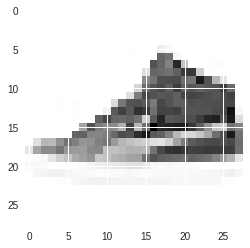

In [0]:
plt.imshow(train_loader.dataset.train_data[1].numpy())

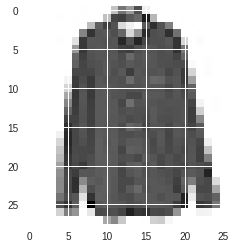

In [0]:
plt.imshow(train_loader.dataset.train_data[10].numpy())

In [0]:
class FcNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, image):
        batch_size = image.size()[0]
        x = image.view(batch_size, -1)
        x = torch.sigmoid(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x    

In [0]:
class CNN_2_16_32(nn.Module):
    def __init__(self):
        super(CNN_2_16_32, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 32, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_2_32_64(nn.Module):
    def __init__(self):
        super(CNN_2_32_64, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_2_64_128(nn.Module):
    def __init__(self):
        super(CNN_2_64_128, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 128, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_3_16_32_64(nn.Module):
    def __init__(self):
        super(CNN_3_16_32_64, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(9 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
class CNN_3_32_64_128(nn.Module):
    def __init__(self):
        super(CNN_3_32_64_128, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(9 * 128, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
def train(model, train_loader, optimizer):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data), Variable(target)
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)  # calls the forward function
        loss = criterion(output, target)
        #loss = F.nll_loss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model


def valid(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    for data, target in valid_loader:
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data, volatile=True), Variable(target)
        data, target = data.cuda(), target.cuda()
        output = model.forward(data)
        valid_loss += criterion(output, target).item()
        #valid_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    valid_loss /= len(valid_loader.dataset)
        
    print('\n' + "valid" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        valid_loss, correct, len(valid_loader.dataset),
        100. * correct / len(valid_loader.dataset)))
    
    return (valid_loss, correct / len(valid_loader.dataset))

    
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    for data, target in test_loader:
        # data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        #data, target = Variable(data, volatile=True), Variable(target)
        data, target = data.cuda(), target.cuda()
        output = model.forward(data)
        test_loss += criterion(output, target).item()
        #test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n' + "test" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    
def experiment(model, epochs=10, lr=0.001):
    best_precision = 0
    best_model = nn.Module()
    losses = []
    accuracies = []
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        model = train(model, train_loader, optimizer)
        loss, precision = valid(model, valid_loader)
        losses.append(loss)
        accuracies.append(precision)
        if precision > best_precision:
            best_precision = precision
            best_model = model
    
    plt.plot( losses )
    plt.title("Losses")
    plt.figure()
    plt.title("Accuracies")
    plt.plot( accuracies )
    plt.show()

    return best_model, best_precision

    


FcNetwork

valid set: Average loss: 0.0040, Accuracy: 5103/6000 (85%)


valid set: Average loss: 0.0035, Accuracy: 5231/6000 (87%)


valid set: Average loss: 0.0033, Accuracy: 5268/6000 (88%)


valid set: Average loss: 0.0032, Accuracy: 5294/6000 (88%)


valid set: Average loss: 0.0029, Accuracy: 5349/6000 (89%)


valid set: Average loss: 0.0029, Accuracy: 5352/6000 (89%)


valid set: Average loss: 0.0030, Accuracy: 5339/6000 (89%)


valid set: Average loss: 0.0028, Accuracy: 5406/6000 (90%)


valid set: Average loss: 0.0028, Accuracy: 5390/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5412/6000 (90%)


valid set: Average loss: 0.0029, Accuracy: 5408/6000 (90%)



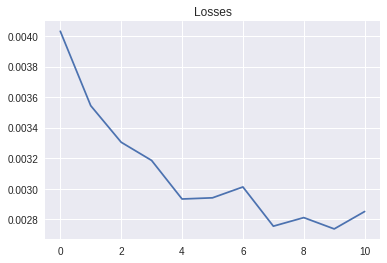

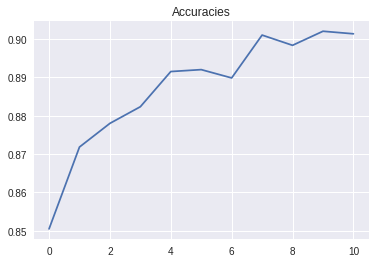


CNN_2_16_32

valid set: Average loss: 0.0033, Accuracy: 5272/6000 (88%)


valid set: Average loss: 0.0028, Accuracy: 5406/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5440/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5453/6000 (91%)


valid set: Average loss: 0.0027, Accuracy: 5424/6000 (90%)


valid set: Average loss: 0.0024, Accuracy: 5491/6000 (92%)


valid set: Average loss: 0.0025, Accuracy: 5453/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5501/6000 (92%)


valid set: Average loss: 0.0024, Accuracy: 5482/6000 (91%)


valid set: Average loss: 0.0023, Accuracy: 5483/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5498/6000 (92%)



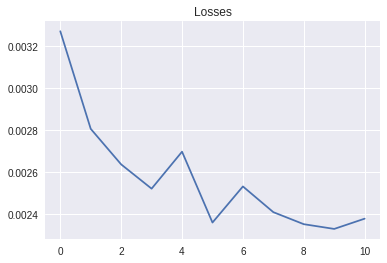

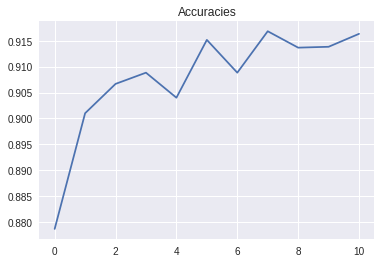


CNN_2_32_64

valid set: Average loss: 0.0032, Accuracy: 5314/6000 (89%)


valid set: Average loss: 0.0031, Accuracy: 5343/6000 (89%)


valid set: Average loss: 0.0026, Accuracy: 5435/6000 (91%)


valid set: Average loss: 0.0026, Accuracy: 5416/6000 (90%)


valid set: Average loss: 0.0025, Accuracy: 5451/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5477/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5490/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5504/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5508/6000 (92%)


valid set: Average loss: 0.0022, Accuracy: 5508/6000 (92%)


valid set: Average loss: 0.0022, Accuracy: 5503/6000 (92%)



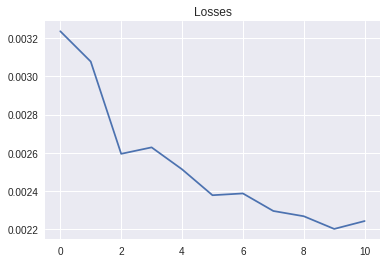

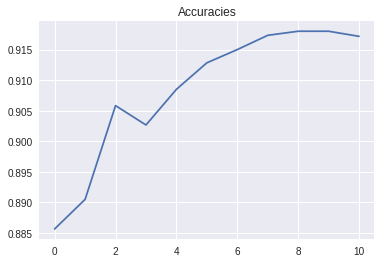


CNN_2_64_128

valid set: Average loss: 0.0035, Accuracy: 5232/6000 (87%)


valid set: Average loss: 0.0030, Accuracy: 5341/6000 (89%)


valid set: Average loss: 0.0028, Accuracy: 5415/6000 (90%)


valid set: Average loss: 0.0028, Accuracy: 5420/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5423/6000 (90%)


valid set: Average loss: 0.0026, Accuracy: 5401/6000 (90%)


valid set: Average loss: 0.0025, Accuracy: 5454/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5482/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5494/6000 (92%)


valid set: Average loss: 0.0024, Accuracy: 5505/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5525/6000 (92%)



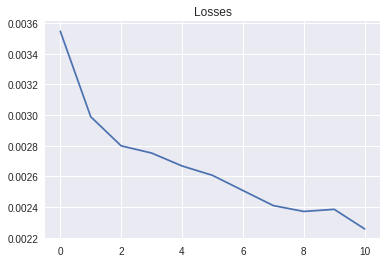

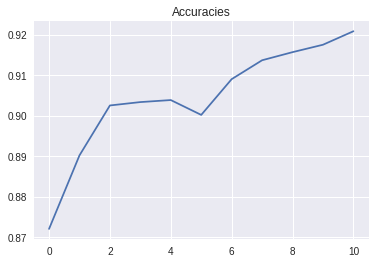


CNN_3_16_32_64

valid set: Average loss: 0.0037, Accuracy: 5204/6000 (87%)


valid set: Average loss: 0.0027, Accuracy: 5393/6000 (90%)


valid set: Average loss: 0.0027, Accuracy: 5412/6000 (90%)


valid set: Average loss: 0.0025, Accuracy: 5453/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5476/6000 (91%)


valid set: Average loss: 0.0025, Accuracy: 5466/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5487/6000 (91%)


valid set: Average loss: 0.0024, Accuracy: 5506/6000 (92%)


valid set: Average loss: 0.0024, Accuracy: 5487/6000 (91%)


valid set: Average loss: 0.0023, Accuracy: 5524/6000 (92%)


valid set: Average loss: 0.0022, Accuracy: 5544/6000 (92%)



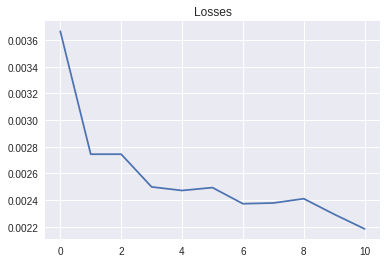

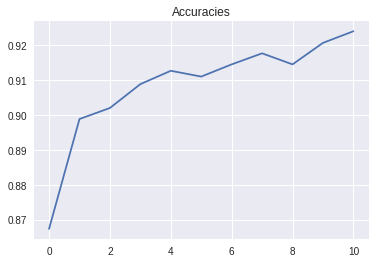


CNN_3_32_64_128

valid set: Average loss: 0.0031, Accuracy: 5308/6000 (88%)


valid set: Average loss: 0.0026, Accuracy: 5420/6000 (90%)


valid set: Average loss: 0.0024, Accuracy: 5498/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5520/6000 (92%)


valid set: Average loss: 0.0024, Accuracy: 5483/6000 (91%)


valid set: Average loss: 0.0022, Accuracy: 5551/6000 (93%)


valid set: Average loss: 0.0023, Accuracy: 5550/6000 (92%)


valid set: Average loss: 0.0022, Accuracy: 5547/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5537/6000 (92%)


valid set: Average loss: 0.0021, Accuracy: 5550/6000 (92%)


valid set: Average loss: 0.0023, Accuracy: 5551/6000 (93%)



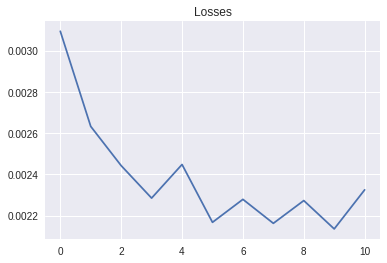

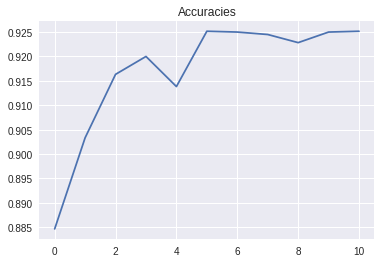


test set: Average loss: 0.0027, Accuracy: 9158/10000 (91%)



In [18]:
best_precision = 0
for model in [FcNetwork(), CNN_2_16_32(), CNN_2_32_64(), CNN_2_64_128(), CNN_3_16_32_64(), CNN_3_32_64_128()]:  # add your models in the list
    model.cuda()  # if you have access to a gpu
    print('\n' + model.__class__.__name__)
    model, precision = experiment(model)
    if precision > best_precision:
        best_precision = precision
        best_model = model

test(best_model, test_loader)

In [20]:
print(best_model)

CNN_3_32_64_128(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5)
  (fc1): Linear(in_features=1152, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)
